In [6]:
# For data analysis
import pandas as pd

# Numerical computations
import numpy as np

# For plotting charts
import matplotlib.pyplot as plt

# For advanced statistical visualizations
import seaborn as sns


In [7]:
# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Preview first few rows
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


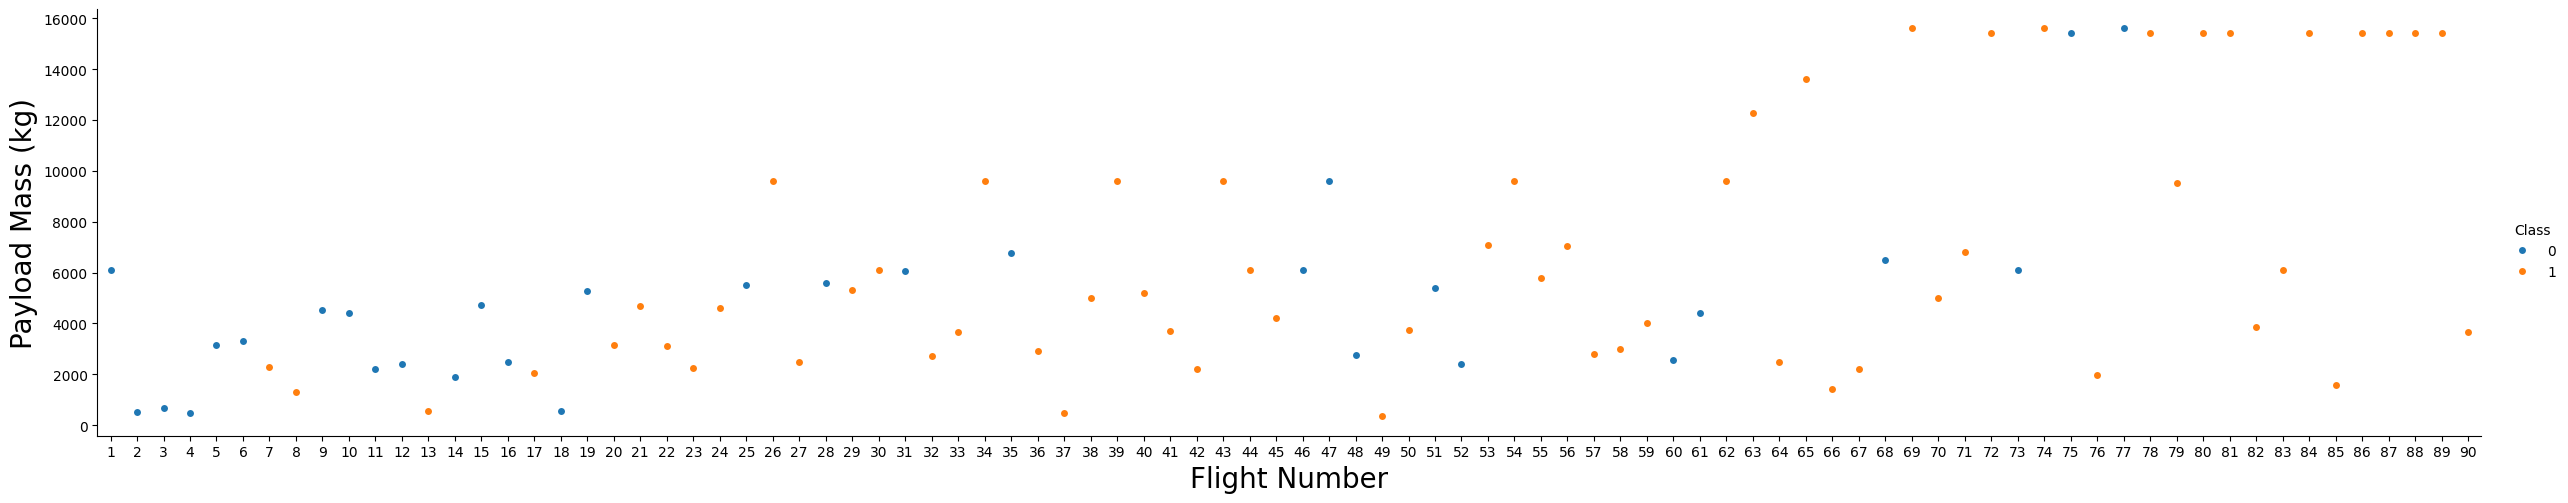

In [8]:
# Payload mass vs flight number by launch success
sns.catplot(
    y="PayloadMass", x="FlightNumber", hue="Class",
    data=df, aspect=5
)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()


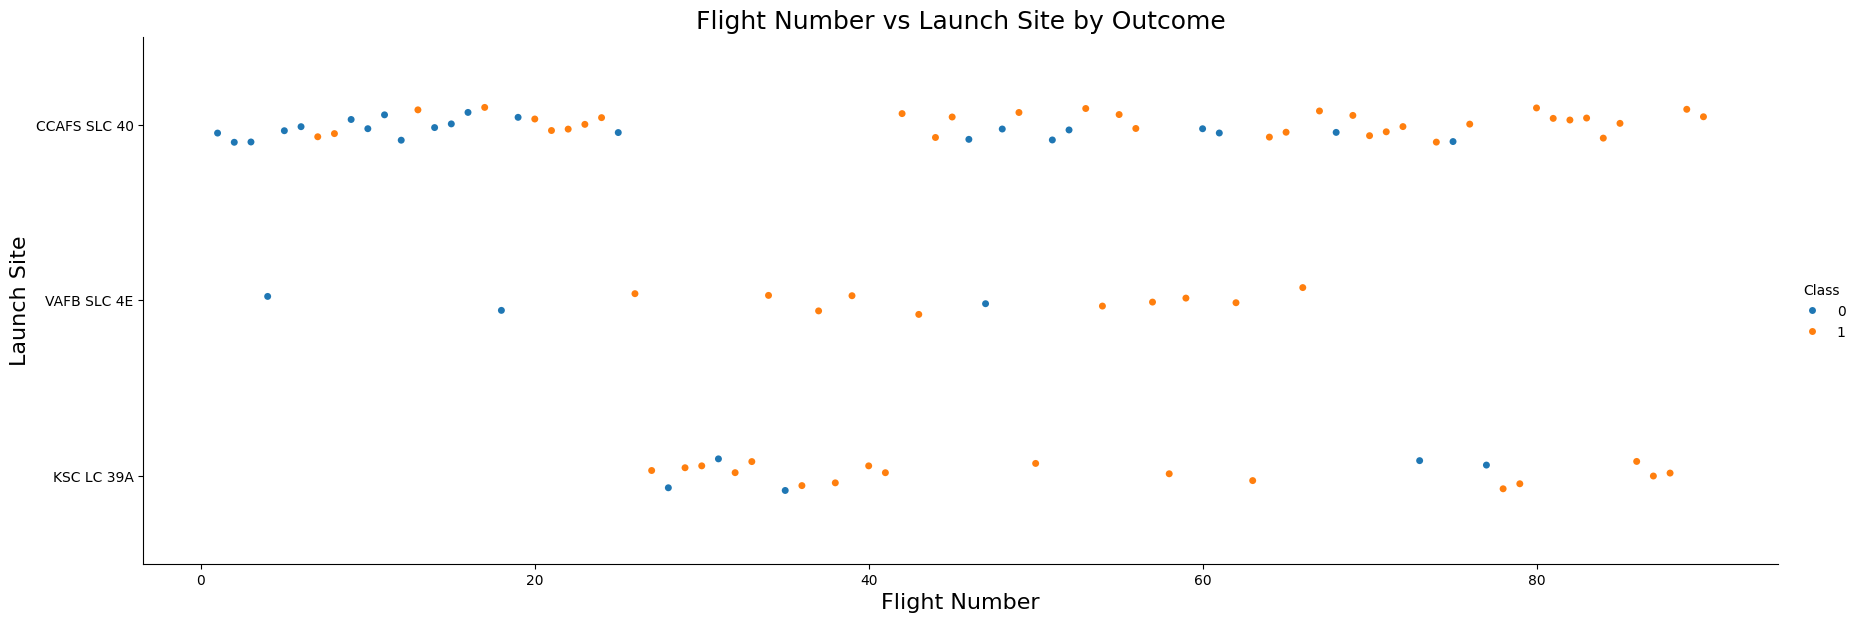

In [9]:
# Flight number vs launch site with launch success color
sns.catplot(
    x="FlightNumber", y="LaunchSite", hue="Class",
    data=df, aspect=3, height=6, kind="strip"
)
plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)
plt.title("Flight Number vs Launch Site by Outcome", fontsize=18)
plt.show()


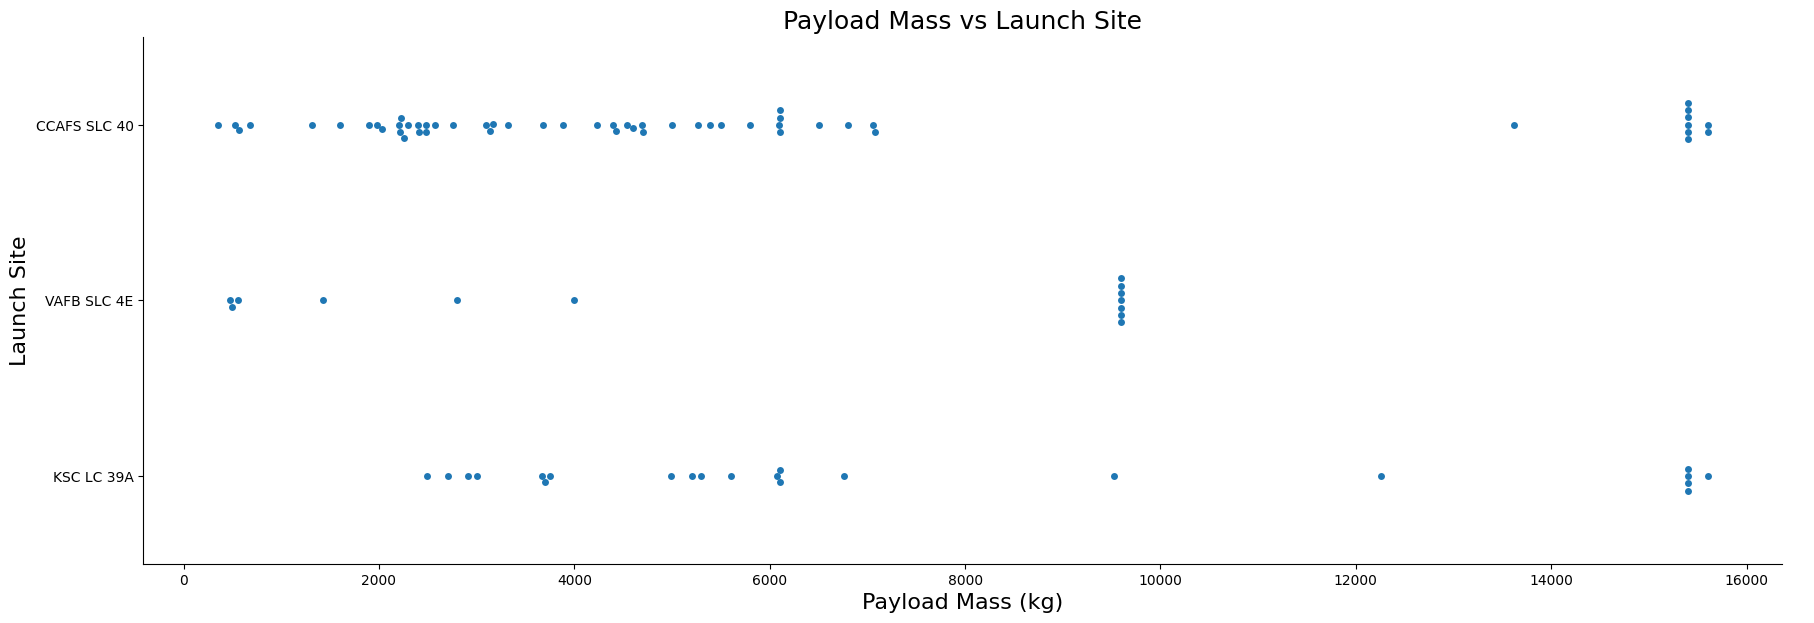

In [10]:
# Payload mass vs launch site with swarm plot
sns.catplot(
    x="PayloadMass", y="LaunchSite",
    data=df, kind="swarm", aspect=3, height=6
)
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)
plt.title("Payload Mass vs Launch Site", fontsize=18)
plt.show()


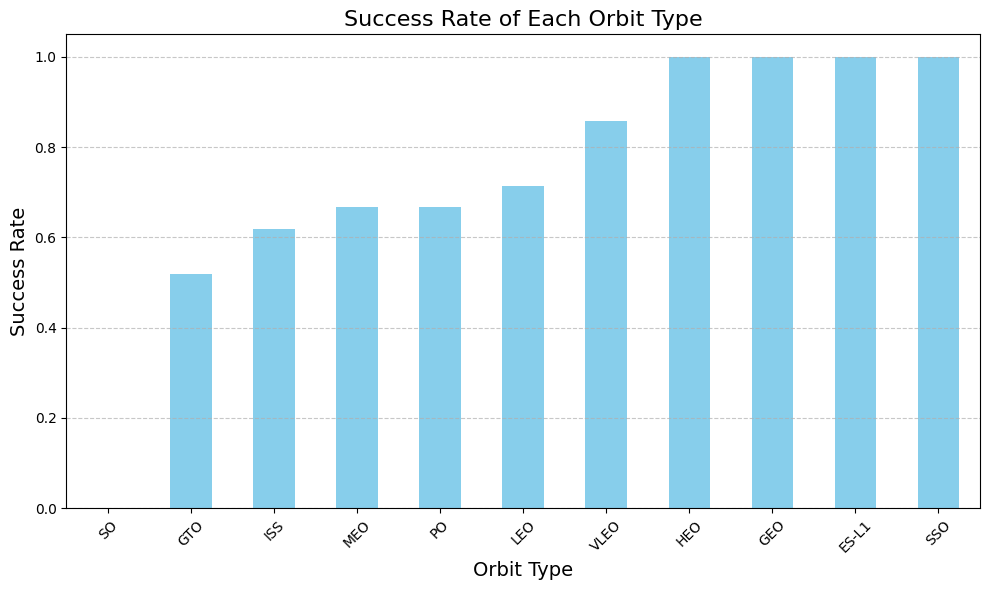

In [11]:
# Compute success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values()

# Plotting the success rate per orbit
plt.figure(figsize=(10, 6))
orbit_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate of Each Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
